# Feature selection and feature engineering
### By the end of this lecture, you will be able to
- select features in supervised ML
- engineer features


### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **select features in supervised ML**
- <font color='LIGHTGRAY'>engineer features</font>


## Feature selection

We cover today how to do feature selection **before** the ML model is trained. We cover later how to select features with ML feature importances.

Necessary if 
- you have too many features: n_ftrs > n_points (some algorithms break down)
- if training an ML algorithm is too computationally expensive using all the features


### Approach

1) You calculate a single number metric between each feature and the target variable **using the training data only**.

- sklearn supported metrics (for both regression and classification)
   - [F test](https://en.wikipedia.org/wiki/F-test) (only measures linear dependency)
   - [mutual information](https://en.wikipedia.org/wiki/Mutual_information) (measures non-linear dependency)
- steps:
   - do you work with a classification or regression problem?
      - regression: 
         - are you interested in linear or non-linear correlations with the target variable?
            - linear: use `sklearn.feature_selection.f_regression`
            - non-linear: use `sklearn.feature_selection.mutual_info_regression`
      - classification:
         - are you interested in linear or non-linear correlations with the target variable?
            - linear: use `sklearn.feature_selection.f_classif`
            - non-linear: use `sklearn.feature_selection.mutual_info_classif`

2) Keep k best features (`sklearn.feature_selection.SelectKBest` method) or keep a certain percentile of the best features (`sklearn.feature_selection.SelectPercentile` method).


#### Pros:
- easy to do
- it is quicker to train ML models with fewer features

#### Cons:
- feature interactions are not taken into account 
   - two features separately are not predictive, but they are predictive together - such effects are ignored!


### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(10)

X = np.random.rand(1000,3)
y = X[:,0] + np.sin(6 * np.pi * X[:,1]) + 0.1 * X[:,2]

f_test, p_values = f_regression(X, y)
print('f score',f_test)
print('p values',p_values)
mi = mutual_info_regression(X, y)
print('mi',mi)

f score [107.90134156  53.99212018   0.34354216]
p values [4.52216746e-24 4.18146945e-13 5.57924253e-01]
mi [0.37637501 0.86317726 0.        ]


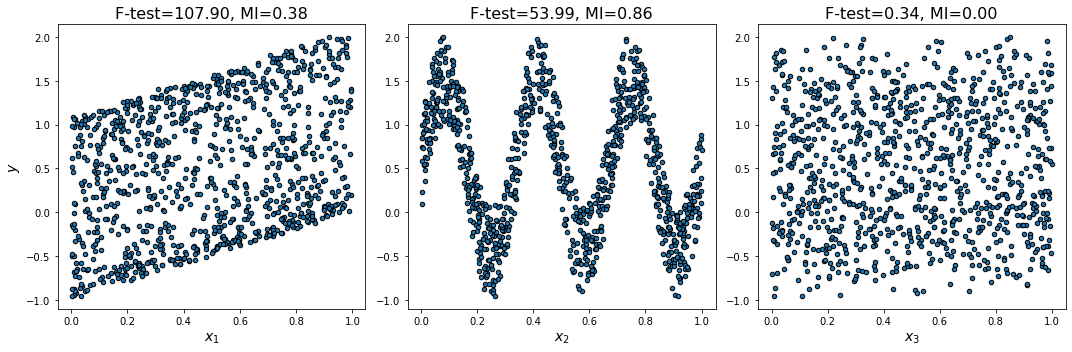

In [2]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.tight_layout()
plt.show()

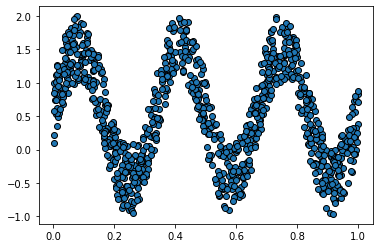

[False  True False]


In [3]:
from sklearn.feature_selection import SelectKBest
f_select = SelectKBest(mutual_info_regression,k=1)
X_f = f_select.fit_transform(X,y)
plt.scatter(X_f,y,edgecolor='k')
plt.show()
# the features selected:
print(f_select.get_support())

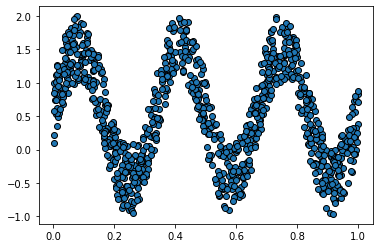

array([False,  True, False])

In [4]:
from sklearn.feature_selection import SelectPercentile
f_selector = SelectPercentile(mutual_info_regression,percentile=33)
X_mi = f_selector.fit_transform(X,y)
plt.scatter(X_mi,y,edgecolor='k')
plt.show()
# features selected
f_selector.get_support()

### Be careful though!

In [5]:
# toy data
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif
np.random.seed(0)

X = np.random.uniform(size=(1000,2)) 

y = np.zeros(1000)
y[(X[:,0]>=0.5)&(X[:,1]<0.5)] = 1
y[(X[:,0]<=0.5)&(X[:,1]>0.5)] = 1

In [6]:
f_test, p_values = f_classif(X, y)
print('f score',f_test)
print('p values',p_values)

mi = mutual_info_classif(X, y)
print('mi',mi)

f score [0.28282382 0.82026181]
p values [0.59497468 0.36532223]
mi [0.00338502 0.00055867]


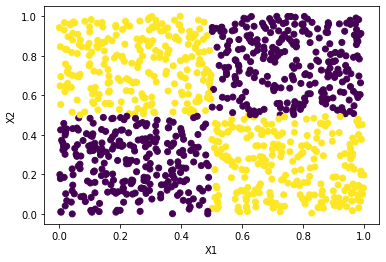

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Quiz 4

The preprocessed and imputed house price dataset is loaded into a dataframe below. Which feature is the most important based on linear dependencies?

In [8]:
df = pd.read_csv('data/house_price_prep_imputed.csv')
y = df['SalePrice'].values # the target variable
df.drop(columns=['SalePrice'],inplace=True)
X = df.values # the feature matrix
feature_names = df.columns # feature names

# add your code below


### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>select features in supervised ML</font>
- **engineer features**


## Feature engineering

Automatic feature engineering:
- combine features in a simple and automatic way (PolynomialFeatures method in sklearn)
- if n_ftrs << n_points, this can modestly improve the predictive power of your model 

Manual feature engineering:
- costly, difficult, project-specific, and requires domain-knowledge of the data
- it can boost the predictive power of your model!

### Automatic feature engineering

In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(2)
print(poly.fit_transform(X)) # [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2, include_bias=False)
print(poly.fit_transform(X)) # [a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2,interaction_only=True, include_bias=False)
print(poly.fit_transform(X)) # [a, b, ab]

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 0.  1.  0.  0.  1.]
 [ 2.  3.  4.  6.  9.]
 [ 4.  5. 16. 20. 25.]]
[[ 0.  1.  0.]
 [ 2.  3.  6.]
 [ 4.  5. 20.]]


### Manual feature engineering

Some advice:
- EDA can give you insights on how you should engineer and preprocess your features better
- normalizing a feature with another feature can often be helpful
   - for example you want to predict who will attend an event
   - two features you have:
      - number of invite emails sent: [10, 20, 10, 20, 5]
      - number of email invites opened: [5, 2, 10, 10, 0]
   - a good new feature could be the fraction of invite emails opened
      - fraction of invite emails opened: [0.5, 0.1, 1, 0.5, 0]
      - person 3 might be more likely to attend than person 2 but that's only obvious from the normalized feature

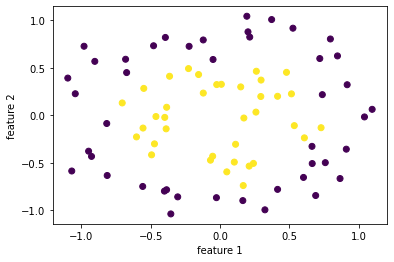

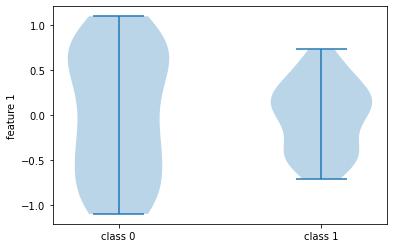

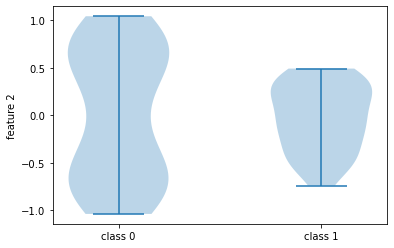

In [10]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.15, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =0)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

dataset = [X_train[y_train==0,0],
           X_train[y_train==1,0]]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['class 0','class 1'])
plt.ylabel('feature 1')
plt.show()


dataset = [X_train[y_train==0,1],
           X_train[y_train==1,1]]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['class 0','class 1'])
plt.ylabel('feature 2')
plt.show()



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def simple_ML_pipeline(X_train,X_test,y_train,y_test):
    LR = LogisticRegression() # logistic regression is a simple linear classifier
    LR.fit(X_train,y_train)
    y_test_pred = LR.predict(X_test)
    return accuracy_score(y_test,y_test_pred)
    
test_score = simple_ML_pipeline(X_train,X_test,y_train,y_test)
print(test_score)

0.3


In [12]:
# add new feature
new_feature = np.sqrt(X_train[:,0]**2+X_train[:,1]**2) # the distance from the origin
X_train = np.hstack((X_train,np.expand_dims(new_feature,axis=1)))
print(X_train[:5,:])
new_feature = np.sqrt(X_test[:,0]**2+X_test[:,1]**2)
X_test = np.hstack((X_test,np.expand_dims(new_feature,axis=1)))

[[-0.05045148  0.58776084  0.58992217]
 [-0.54933449  0.28364692  0.61824264]
 [-0.55471872 -0.13344625  0.57054426]
 [-0.90194371  0.56791184  1.06584535]
 [ 0.41429957 -0.77851327  0.88188834]]


In [13]:
test_score = simple_ML_pipeline(X_train,X_test,y_train,y_test)
print(test_score) # the test accuracy improved a lot!

1.0


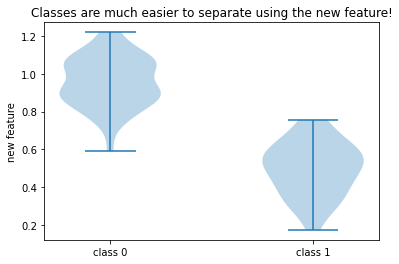

In [14]:
dataset = [X_train[y_train==0,2],
           X_train[y_train==1,2]]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['class 0','class 1'])
plt.ylabel('new feature')
plt.title('Classes are much easier to separate using the new feature!')
plt.show()


## Quiz 5

X has three columns: a, b, and c.

```python
X = np.arange(9).reshape(3, 3)

poly = PolynomialFeatures(degree = 2, include_bias = False)
print(poly.fit_transform(X)) ```

What will be the shape of the transformed X? Do not run the code. Work the problem out with pen and paper or in your head.